In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [3]:
# bad formatting
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# rename columns to something better
df.columns = ['labels','data']

In [10]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   data      5572 non-null   object
 2   b_labels  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [12]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [13]:
df_train.shape, df_test.shape

((3733, 3), (1839, 3))

In [14]:
# 0 = padding
idx = 1
word2idx = {'<PAD>': 0}

In [15]:
# you could always use gensim or spacy for tokenization,
# but let's keep it simple!
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split() # simple tokenization
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [16]:
word2idx

{'<PAD>': 0,
 'yup': 1,
 'n': 2,
 'her': 3,
 'fren': 4,
 'lor.': 5,
 "i'm": 6,
 'meeting': 7,
 'my': 8,
 'at': 9,
 '730.': 10,
 'ìï': 11,
 'takin': 12,
 'linear': 13,
 'algebra': 14,
 'today?': 15,
 'congratulations': 16,
 'u': 17,
 'can': 18,
 'claim': 19,
 '2': 20,
 'vip': 21,
 'row': 22,
 'a': 23,
 'tickets': 24,
 'c': 25,
 'blu': 26,
 'in': 27,
 'concert': 28,
 'november': 29,
 'or': 30,
 'gift': 31,
 'guaranteed': 32,
 'call': 33,
 '09061104276': 34,
 'to': 35,
 'ts&cs': 36,
 'www.smsco.net': 37,
 'costå£3.75max': 38,
 'urgent!': 39,
 'we': 40,
 'are': 41,
 'trying': 42,
 'contact': 43,
 'u.': 44,
 'todays': 45,
 'draw': 46,
 'shows': 47,
 'that': 48,
 'you': 49,
 'have': 50,
 'won': 51,
 'å£2000': 52,
 'prize': 53,
 'guaranteed.': 54,
 '09066358361': 55,
 'from': 56,
 'land': 57,
 'line.': 58,
 'y87.': 59,
 'valid': 60,
 '12hrs': 61,
 'only': 62,
 '\\thinking': 63,
 'of': 64,
 ';)': 65,
 'x\\""': 66,
 'hahaha..use': 67,
 'your': 68,
 'brain': 69,
 'dear': 70,
 'aight,': 71,
 'me'

In [17]:
len(word2idx)

10522

In [18]:
# convert data into word indices
# note: could have done this on the fly earlier
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [19]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [20]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [21]:
def data_generator(X, y, batch_size=32):
  X, y = shuffle(X, y)
  n_batches = int(np.ceil(len(y) / batch_size))
  for i in range(n_batches):
    end = min((i+1) * batch_size, len(y))
    X_batch = X[i * batch_size:end]
    y_batch = y[i * batch_size:end]
    # pad X_batch to be N x T
    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]
      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x

    # convert to tensor
    X_batch = torch.from_numpy(np.array(X_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()
    yield X_batch, y_batch

In [22]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
  print(f"inputs: {inputs}, shape: {inputs.shape}")
  print(f"targets: {targets}, shape: {targets.shape}")
  break

inputs: tensor([[   0,    0,    0,  ..., 7737, 1341, 5017],
        [   0,    0,    0,  ...,  795, 1405,   70],
        [   0,    0,    0,  ..., 1323, 7206, 7207],
        ...,
        [   0,    0,    0,  ...,  427,   35,  428],
        [   0,    0,    0,  ...,  414, 2650, 2651],
        [   0,    0,    0,  ...,   72,  270, 5148]]), shape: torch.Size([32, 33])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), shape: torch.Size([32])


In [23]:
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
  print(f"inputs: {inputs}, shape: {inputs.shape}")
  print(f"targets: {targets}, shape: {targets.shape}")
  break

inputs: tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,   515,
          1917,     8,  3310,  6190,   463],
        [    0,     0,     0,     0,     0,  7287,  2069,    76,   203,   185,
           256,     9,   916,   155,   236,    72,  1341,    35,   730,    27,
           133,   347,   521,    17,    18],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,    48,
           517,    49,   192,    81,  2275],
        [    0,     0,     0,     0,     0,     0,  5168,  3250,   505,  4172,
          5168,   133,   414,   270,  2440,   385,    33,   155,  8492,    35,
           398,  3257,    33,  3258,  3259],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,  1152,   343,    76,   201,   554,
            86,  1261,

In [24]:
# set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [25]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers
    self.embed = nn.Embedding(self.V, self.D)

    # note: batch_first=True
    # applies the convention that our data will be of shape:
    # (num_samples, sequence_length, num_features)
    # rather than:
    # (sequence_length, num_samples, num_features)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True
    )
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)
    # get RNN unit output
    # out is of size (N, T, M)
    # 2nd return value is hidden states of each hidden layer
    # we don't need those now
    out, _ = self.rnn(out, (h0, c0))
    # max pool
    out, _ = torch.max(out,1)
    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [26]:
# Instantiate the model
model = RNN(n_vocab=len(word2idx), embed_dim=20, n_hidden=15, n_rnnlayers=1, n_outputs=1)
model.to(device)

RNN(
  (embed): Embedding(10522, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [27]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [28]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda: data_generator(test_sentences_as_int, df_test.b_labels)

In [29]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      targets = targets.view(-1,1).float()
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zer0 the parameter gradients
      optimizer.zero_grad()

      # forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1,1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")


  return train_losses, test_losses

In [30]:
train_losses, test_losses = batch_gd(model, criterion, optimizer,
                                     epochs=15)

Epoch 1/15, Train Loss: 0.4526, Test Loss: 0.3702, Duration: 0:00:01.337961
Epoch 2/15, Train Loss: 0.3584, Test Loss: 0.3192, Duration: 0:00:00.603364
Epoch 3/15, Train Loss: 0.2976, Test Loss: 0.2593, Duration: 0:00:00.628565
Epoch 4/15, Train Loss: 0.2287, Test Loss: 0.2007, Duration: 0:00:00.698509
Epoch 5/15, Train Loss: 0.1693, Test Loss: 0.1546, Duration: 0:00:00.856969
Epoch 6/15, Train Loss: 0.1296, Test Loss: 0.1307, Duration: 0:00:00.594153
Epoch 7/15, Train Loss: 0.0989, Test Loss: 0.1157, Duration: 0:00:00.782449
Epoch 8/15, Train Loss: 0.0774, Test Loss: 0.1094, Duration: 0:00:00.765771
Epoch 9/15, Train Loss: 0.0646, Test Loss: 0.0984, Duration: 0:00:00.762319
Epoch 10/15, Train Loss: 0.0536, Test Loss: 0.0916, Duration: 0:00:00.729815
Epoch 11/15, Train Loss: 0.0439, Test Loss: 0.0909, Duration: 0:00:00.556554
Epoch 12/15, Train Loss: 0.0374, Test Loss: 0.0825, Duration: 0:00:00.639320
Epoch 13/15, Train Loss: 0.0311, Test Loss: 0.0829, Duration: 0:00:00.718392
Epoch 14

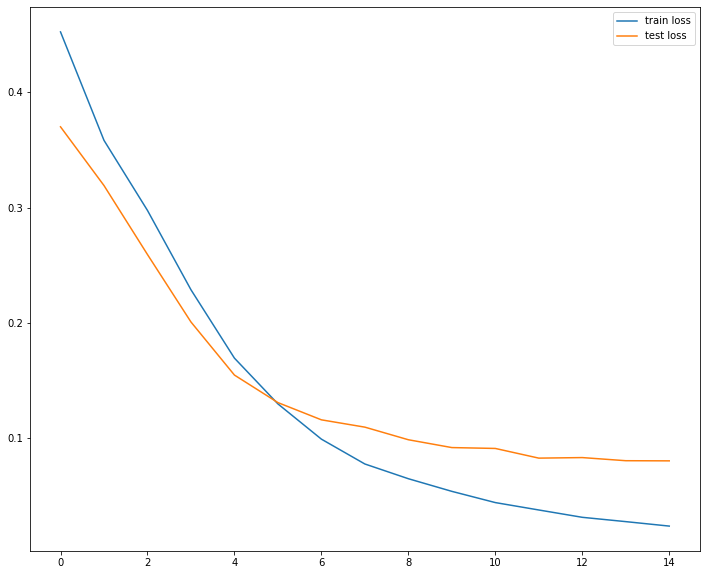

In [31]:
# plot the train loss and test loss per iteration
plt.figure(figsize=(12,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [32]:
# Accuracy

model.eval()
n_correct = 0
n_total = 0
for inputs, targets in train_gen():
  targets = targets.view(-1,1).float()
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  # forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct/n_total

n_correct = 0
n_total = 0
for inputs, targets in test_gen():
  targets = targets.view(-1,1).float()
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  # forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct/n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9965, Test acc: 0.9788


In [33]:
df[df['labels'] == 'spam'].size / df.size

0.13406317300789664

In [34]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(f"{cm}\n")
  plt.figure(figsize=(8,8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[1603    0]
 [ 236    0]]



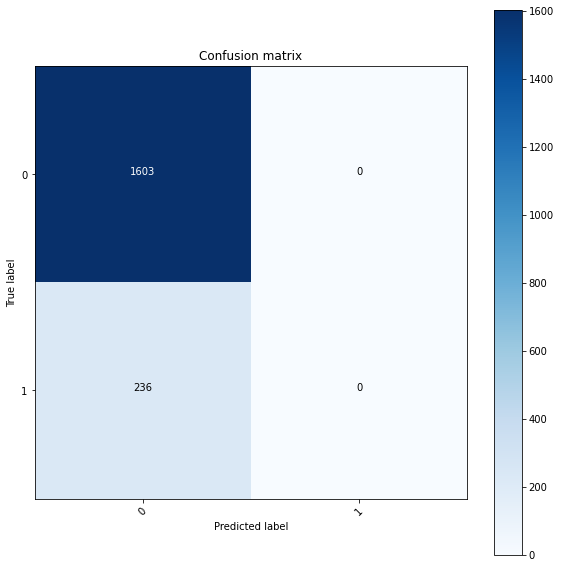

In [35]:
# Get all predictions in an array and plot confusiuon matrix

x_test = df_test.data.values
y_test = df_test.b_labels.values
p_test = np.array([])
for inputs, targets in test_gen():
  targets = targets.view(-1,1).float()
  # move data to GPU
  inputs = inputs.to(device)
  # forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(2)))

In [36]:
# pick any random text, or make up your own
# samp = df_test['data'].sample()
# print(samp)
text = df_test.iloc[1024]['data']
text

'Like a personal sized or what'

In [37]:
# convert the text to a sequence of ints
tokens = text.lower().split()
text_int = [word2idx[token] for token in tokens if token in word2idx]

In [38]:
# make a torch tensor
text_tensor = torch.from_numpy(np.array([text_int]))
text_tensor

tensor([[ 321,   23, 2547,   30,  795]])

In [39]:
with torch.no_grad():
  out = model(text_tensor.to(device))

In [40]:
out

tensor([[-0.8643]], device='cuda:0')